In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

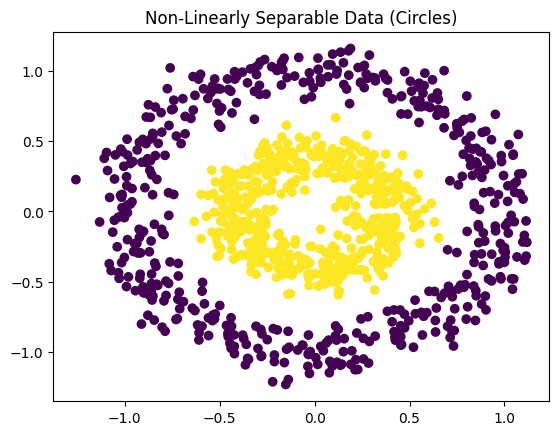

In [56]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Generate non-linearly separable data
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.4, random_state=42)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Non-Linearly Separable Data (Circles)")
plt.show()


<Axes: xlabel='Feature1', ylabel='Feature2'>

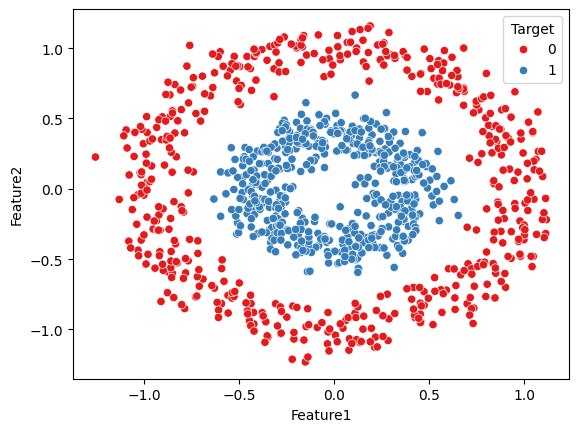

In [57]:
df = pd.DataFrame(data=X, columns=['Feature1', 'Feature2'])
df['Target'] = y
sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='Target', palette='Set1')

### Let's implement polynomial kernel SVM 

In [58]:
df['X1_sq'] = df['Feature1'] ** 2
df['X2_sq'] = df['Feature2'] ** 2
df['X1*X2'] = df['Feature1'] * df['Feature2']

In [59]:
df.head()

,Feature1,Feature2,Target,X1_sq,X2_sq,X1*X2
0,0.325956,0.180362,1,0.106247,0.032530,0.058790
1,-0.284041,0.142219,1,0.080680,0.020226,-0.040396
2,-0.469180,0.293518,1,0.220130,0.086153,-0.137713
3,-0.347336,0.258668,1,0.120642,0.066909,-0.089845
4,0.454089,-0.890466,0,0.206197,0.792929,-0.404350


In [60]:
X = df[['Feature1', 'Feature2', 'X1_sq', 'X2_sq', 'X1*X2']]
y = df['Target']

In [61]:
import plotly.express as px
px.scatter_3d(df, x='Feature1', y='Feature2', z='X1*X2', color='Target')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('Feature1=%{x}<br>Feature2=%{y}' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AQEBAQABAQEBAAEAAQEBAQABAQABAA' ... 'EAAQEAAAAAAAAAAAEAAQAAAAEAAA=='),
                                   'dtype': 'i1'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('d8b3qXXc1D92UhVDvC3Sv+zGLaoKB9' ... 'BOVy6gv7+ToTNzZOQ/MU+JIFhl0T8='),
                    'dtype': 'f8'},
              'y': {'bdata': ('LIUzsxcWxz/ArefDODTCPz8qbiUAyd' ... 'vGLU7ev5FXeZbqb+u/quq/DQI97z8='),
                    'dtype': 'f8'},
              'z': {'bdata': ('B5esLLcZrj8EjfntyK6kv5wz1l2SoM' ... 'Ho86WOP1IGmiETfOG/xAxSrVf70D8='),
                    'dtype': 'f8'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Target'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'Feature1'}},
                         'yaxis': {'title': {'text': 'Feature2'}},
                         'zaxis': {'title': {'text': 'X1*X2'}}},
               'template': '...'}
})

In [62]:
import plotly.express as px
px.scatter_3d(df, x='X1_sq', y='X2_sq', z='X1*X2', color='Target')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'X1_sq=%{x}<br>X2_sq=%{y}<br>X1*X2=%{z}<br>Target=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': {'bdata': ('AQEBAQABAQEBAAEAAQEBAQABAQABAA' ... 'EAAQEAAAAAAAAAAAEAAQAAAAEAAA=='),
                                   'dtype': 'i1'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'x': {'bdata': ('0doO0AMzuz8Ie5BSaqe0P+fWw4s1Lc' ... 'HUNF1QP+7LVqSW/dk/+POjL93psj8='),
                    'dtype': 'f8'},
              'y': {'bdata': ('zANCUtGnoD+ODYwqKraUP0tP5GcdDr' ... 'jUVLPMPwZpGEhjhuc/FmR4Sqh+7j8='),
                    'dtype': 'f8'},
              'z': {'bdata': ('B5esLLcZrj8EjfntyK6kv5wz1l2SoM' ... 'Ho86WOP1IGmiETfOG/xAxSrVf70D8='),
                    'dtype': 'f8'}}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Target'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'scene': {'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                         'xaxis': {'title': {'text': 'X1_sq'}},
                         'yaxis': {'title': {'text': 'X2_sq'}},
                         'zaxis': {'title': {'text': 'X1*X2'}}},
               'template': '...'}
})

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[['X1_sq','X2_sq','X1*X2']], y, test_size=0.2, random_state=42)

In [64]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[ 99   1]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.99      1.00      1.00       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Accuracy: 0.995


In [69]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 99   1]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.99      1.00      1.00       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [70]:
from sklearn.svm import SVC
model = SVC(kernel='poly')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 99   1]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.99      1.00      1.00       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [71]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[100   0]
 [  0 100]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

